In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tyssue import config, Sheet, SheetGeometry, History
from tyssue.draw import sheet_view
from tyssue.generation import three_faces_sheet
from tyssue.draw.plt_draw import plot_forces

from tyssue.dynamics.sheet_vertex_model import SheetModel




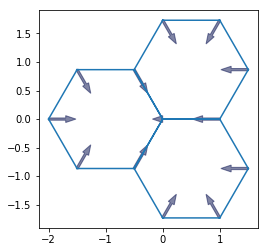

In [4]:
sheet = Sheet('3', *three_faces_sheet())
SheetGeometry.update_all(sheet)


sheet.update_specs(config.dynamics.quasistatic_sheet_spec())
sheet.face_df["prefered_vol"] = sheet.face_df["vol"].mean()
history = History(sheet)

fig, ax = plot_forces(sheet, SheetGeometry, SheetModel, ['x', 'y'], 1)
#

In [5]:
sheet.vert_df['friction'] = 100

for c in sheet.coords:
    sheet.vert_df['v'+c] = 1



$\eta v  = \sum F$

In [50]:
dt = 0.1
sheet.face_df.loc[0, 'prefered_vol'] *= 2 
for t in range(100):
    force = - SheetModel.compute_gradient(sheet)
    sheet.vert_df[sheet.coords] += (
        force.values / sheet.vert_df['friction'].values[:, np.newaxis]) * dt
    SheetGeometry.update_all(sheet)
    history.record(['vert', 'edge'])

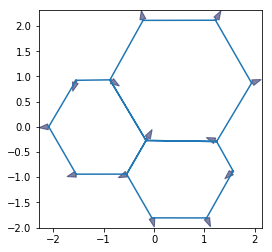

In [51]:
fig, ax = plot_forces(sheet, SheetGeometry, SheetModel, ['x', 'y'], 1)
#

In [54]:
from ipywidgets import interact

fig = plt.figure(2)

def player(t):
    plt.figure(2)
    ax = plt.gca()
    sheet = Sheet(t, history.retrieve(t))
    SheetGeometry.update_all(sheet)
    ax.clear()
    _ = sheet_view(sheet, mode='quick', ax=ax)
    fig.canvas.draw()
    
interact(player, t=(0, 99))

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=49, description='t', max=99), Output()), _dom_classes=('widget-interact'…

<function __main__.player(t)>